### Importing basic libraries

In [1]:
import pandas as pd 
import numpy as np 

### Reading data

In [2]:
df=pd.read_csv("trainable.csv")

In [3]:
df.head()

,enrollment,duration,phase_encoded,condition_encoded,intervention_type_encoded,study_design_encoded,sponsor_type_encoded,gender_encoded,location_encoded,masking_encoded,final_status
0,276.0,2009.000000,3,238,6,1,3,0,1179,2,1
1,53.0,992.442074,1,5511,6,1,3,0,1179,1,1
2,371.0,1096.000000,5,1405,6,1,3,0,1179,1,1
3,20.0,974.000000,3,3424,6,1,6,0,533,1,1
4,58.0,2130.000000,2,3001,6,0,5,1,1077,1,1


In [5]:
df.columns

Index(['enrollment', 'duration', 'phase_encoded', 'condition_encoded',
       'intervention_type_encoded', 'study_design_encoded',
       'sponsor_type_encoded', 'gender_encoded', 'location_encoded',
       'masking_encoded', 'final_status'],
      dtype='object')

### Installing xgboost (optional)

In [4]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 36.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 32.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]


### Importing necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc, RocCurveDisplay, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

### Splitting X and Y

In [7]:
# 1. Split X and y
X = df.drop(columns=['final_status'])
y = df['final_status']

### Train-Test Split

In [8]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Define model

In [9]:
# 3. Define XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


### Define hyperparameters for tuning

In [16]:
# 4. Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

### Hyperparameter tuning

In [17]:
# 5. Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:40:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:40:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:40:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:40:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

### Loading best parameters

In [22]:
# 6. Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.8}


In [23]:
# 7. Predict labels and risk scores
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of class '1' (Success)

### Generating classification report

In [32]:
# Generate classification report
report = classification_report(y_test, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Combine report with accuracy manually
full_report = f"{report}\nAccuracy: {accuracy:.4f}"

# Print to console
print(full_report)

              precision    recall  f1-score   support

           0       0.85      0.57      0.68      2858
           1       0.75      0.93      0.83      4000

    accuracy                           0.78      6858
   macro avg       0.80      0.75      0.76      6858
weighted avg       0.79      0.78      0.77      6858

Accuracy: 0.7787


### Displaying confusion matrix

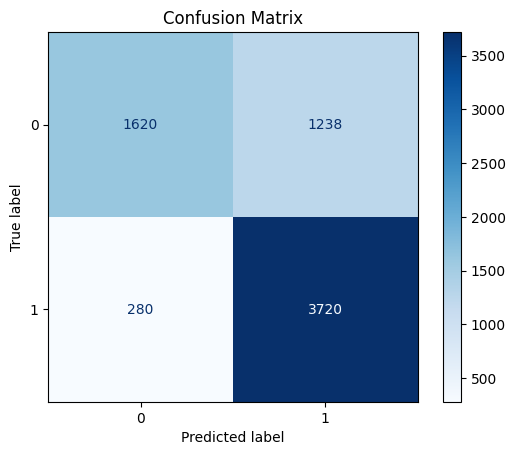

In [33]:
# 9. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 📊 Risk Score Formula

The **risk score** is calculated as:

**Risk Score (%) = P(class = 1) × 100**

Where:
- `P(class = 1)` is the probability (confidence) that the model assigns to the trial being a **success**.
- Values closer to 100% → model is more confident it's a **success**.
- Values closer to 0% → model is more confident it's a **failure**.


In [41]:
# Get probability of class 1 (success)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Print risk scores for first 10 samples
for i, prob in enumerate(y_proba[:10]):
    print(f"Sample {i+1}: Risk Score = {prob * 100:.2f}% that trial will be completed")


Sample 1: Risk Score = 62.84% that trial will be completed
Sample 2: Risk Score = 79.80% that trial will be completed
Sample 3: Risk Score = 12.64% that trial will be completed
Sample 4: Risk Score = 84.19% that trial will be completed
Sample 5: Risk Score = 73.92% that trial will be completed
Sample 6: Risk Score = 94.11% that trial will be completed
Sample 7: Risk Score = 69.54% that trial will be completed
Sample 8: Risk Score = 59.23% that trial will be completed
Sample 9: Risk Score = 66.28% that trial will be completed
Sample 10: Risk Score = 79.78% that trial will be completed


### Saving classifcation report

In [35]:
# 1. Save classification report to a text file
report = classification_report(y_test, y_pred)
with open("classification_report.txt", "w") as f:
    f.write("XGBoost Classification Report\n")
    f.write("=============================\n\n")
    f.write(report)


### Adding accuracy to the saved classification report

In [36]:
# Save to file
with open("classification_report.txt", "w") as f:
    f.write(full_report)

### Saving ROC Curve

In [37]:
# 2. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 3. Plot and save ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBoost').plot()
plt.title('ROC Curve')
plt.savefig("roc_curve.png", dpi=300)
plt.close()

<Figure size 640x480 with 0 Axes>

### Creating pickle file

In [38]:
import pickle

# Save the best XGBoost model to a pickle file
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(best_model, f)



### Creating tar file

In [42]:
import tarfile

# Create a .tar archive and add the .pkl file into it
with tarfile.open("xgb_model.tar.gz", "w:gz") as tar:
    tar.add("xgb_model.pkl")

print("Model archive created as 'xgb_model.tar'")


Model archive created as 'xgb_model.tar'
